# Label Encoding

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My\ Drive


/content/drive/My Drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

## Reading the data

In [0]:
data = pd.read_csv(r'./Data/raw-data/small.csv', sep=';')
data = data.drop('duration',axis=1)
data.head()

age          job  marital  ... euribor3m nr.employed   y
0   30  blue-collar  married  ...     1.313      5099.1  no
1   39     services   single  ...     4.855      5191.0  no
2   25     services  married  ...     4.962      5228.1  no
3   38     services  married  ...     4.959      5228.1  no
4   47       admin.  married  ...     4.191      5195.8  no

[5 rows x 20 columns]

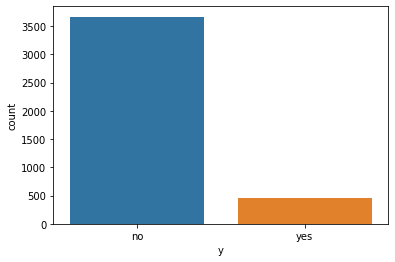

In [0]:
sns.countplot(x='y',data=data)

### We can see that the data is very skewed, so we duplicate the tuples corresponding to 'yes'

In [0]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

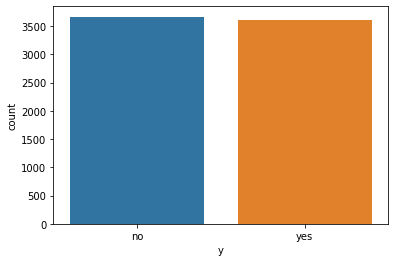

In [0]:
sns.countplot(x='y',data=data)

## Now the data looks much more balanced

## Aanalising the data distribution by plotting graphs for numerical fields 

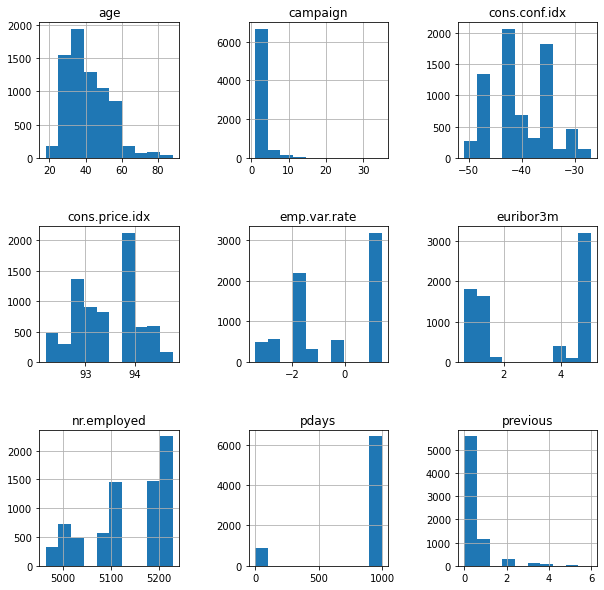

In [0]:
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

## We can see that the data is not evenly distributed, therefore we need to standardize

## Splitting 'pdays' feature into 2 features(i.e. 'pdays' and 'pdays2')

In [0]:
#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data['pdays2']=data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data['pdays']=data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data['pdays']=data['pdays'].astype(int)
data.head()

age          job  marital  ... nr.employed   y pdays2
0   30  blue-collar  married  ...      5099.1  no      0
1   39     services   single  ...      5191.0  no      0
2   25     services  married  ...      5228.1  no      0
3   38     services  married  ...      5228.1  no      0
4   47       admin.  married  ...      5195.8  no      0

[5 rows x 21 columns]

## Standardizing the data

In [0]:
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

In [0]:
data.head()

age          job  marital  ... nr.employed   y pdays2
0  0.171429  blue-collar  married  ...    0.512287  no      0
1  0.300000     services   single  ...    0.859735  no      0
2  0.100000     services  married  ...    1.000000  no      0
3  0.285714     services  married  ...    1.000000  no      0
4  0.414286       admin.  married  ...    0.877883  no      0

[5 rows x 21 columns]

## Label Encoding

In [0]:
le = preprocessing.LabelEncoder()
data.job = le.fit_transform(data.job)
data.marital = le.fit_transform(data.marital)
data.education = le.fit_transform(data.education)
data.default = le.fit_transform(data.default)
data.housing = le.fit_transform(data.housing)
data.loan = le.fit_transform(data.loan)
data.contact = le.fit_transform(data.contact)
data.month = le.fit_transform(data.month)
data.day_of_week = le.fit_transform(data.day_of_week)
data.poutcome = le.fit_transform(data.poutcome)
data.y = le.fit_transform(data.y)
data.head()

age  job  marital  education  ...  euribor3m  nr.employed  y  pdays2
0  0.171429    1        1          2  ...   0.153741     0.512287  0       0
1  0.300000    7        2          3  ...   0.956916     0.859735  0       0
2  0.100000    7        1          3  ...   0.981179     1.000000  0       0
3  0.285714    7        1          2  ...   0.980499     1.000000  0       0
4  0.414286    0        1          6  ...   0.806349     0.877883  0       0

[5 rows x 21 columns]

In [0]:
data.shape

(7276, 21)

In [0]:
data.to_csv(r"./Data/small_le.csv", index=False)

## Label Encoding Done!

### Note: Every Model used One Hot Encoded Data, except Random Forest Classifier which uses Label Encoded Data